## *Задача 1* 


Напишите функцию, которая вычисляет локализацию всех собственных значений данной матрицы с помощью кругов Гершгорина. 

Для этого используем теорему Гершгорина:

 все собственные значения матрицы $A$ лежат в объединении кругов $S_{1}, S_{2}, \ldots, S_{n}$, где
$$
S_{i}=\left\{z \in C:\left|z-a_{i i}\right| \leq r_{i}\right\}, \quad r_{i}=\sum_{j=1}^{n}\left|a_{i j}\right|-\text { сумма модулей внедиагональных }
$$
элементов $\textrmі$ -ой строки матрицы $A$; если $\mathrm{k}$ кругов образуют замкнутую область, изолированную от других кругов, то в этой области находится ровно $\mathrm{k}$ собственных значений с учётом их кратности. 

Функция должна на вход принимать матрицу, на выход давать список кругов Гершгорина, задаваемых двумя числами - центром круга (комплексное число) и радиусом. 

Сделайте также вторую функцию - визуализацию кругов Гершгорина.

Протестировать программу для матрицы 

$A=\left(\begin{array}{ccc}
-2 & 0,5 & 0,5 \\
-0,5 & -3,5 & 1,5 \\
0,8 & -0,5 & 0,5
\end{array}\right) 
$

Ответ должен быть 

\begin{aligned}
&S_{1}=\{z \in C:|z+2| \leq 1\} \\
&S_{2}=\{z \in C:|z+3,5| \leq 2\} \\
&S_{3}=\{z \in C:|z-0,5| \leq 1,3\}
\end{aligned}

Замечание: Существуют более сложные фигуры, под названием овалы Cassini, которые содержат спектр


$$
M_{i j}=\left\{z \in \mathbb{C}:\left|a_{i i}-z\right| \cdot\left|a_{j j}-z\right| \leq r_{i} r_{j}\right\}, \quad r_{i}=\sum_{l \neq i}\left|a_{i l}\right|
$$  

https://en.wikipedia.org/wiki/Cassini_oval  

In [12]:
import numpy as np
import matplotlib.pyplot as plt 

In [18]:
def get_gershgorin_circles(A):
    cg = np.diag(A)
    rg = np.sum(np.abs(A), axis=1) - np.abs(cg)
    return (cg, rg)

In [19]:
def print_circles(ax, c, r):
    for centre, rad in zip(c, r):
        x = centre.real
        y = centre.imag
        crc = plt.Circle((x, y), radius=rad, fill=False)
        ax.add_patch(crc)

In [25]:
A = np.array([[-2, 0.5, 0.5],
              [--0.5, -3.5, 1.5],
              [0.8, -0.5, 0.5]])

[-2.  -3.5  0.5]
[1.  2.  1.3]


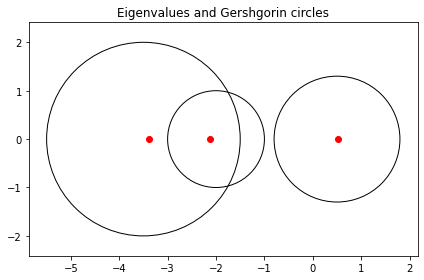

In [27]:
fig, ax = plt.subplots(1, 1)

cg, rg = get_gershgorin_circles(A)
print(cg)
print(rg)
print_circles(ax, cg, rg)

ev = np.linalg.eigvals(A)
plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")

ax.axis('equal')
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

## *Задача 2*


Обычно вычисление собственных значений и собственных векторов необходимо для изучения
- вибраций в механических структурах
- снижения сложности моделей сложных систем 

Более половины вычислительных мощностей в мире тратится на решение задач такого типа для задач.

Одна из самых известных задач о вычислении собственных векторов - задача о ранжировании $n$ веб-страниц (Google PageRank). Подход, который вам нужно будет реализовать в этой задаче, был одним из главных в работе Google на раннем этапе.

Всё, что мы собираемся использовать - структуру взаимных ссылок между страницами. PageRank определяется рекурсивно: важность $i$-й страницы определяется как среднее значение важностей всех страниц, которые ссылаются на $i$-ю. Обозначим важность $i$-й страницы $p_{i}$, тогда это определение может быть записано в виде линейной системы:
$$
p_{i}=\sum_{j} \frac{p_{j}}{L(j)} l_{i j}
$$
где $l_{i j}=1$ если $j$-я страница ссылается на $i$-ю (в противном случае $\left.l_{i j}=0\right)$, а $L(j)-$ количество исходящих ссылок со страницы $j$. Система может быть переписана в виде задачи на собственное значение:
$$
p=G p, \quad G_{i j}=\frac{l_{i j}}{L(j)}
$$
Если в графе есть 'подвешенные' узлы (все элементы какого-то столбца равны нулю), то весь столбед заполняется числом $1 / n$. Наконец, вводится параметр $0<\beta<1$ так что матрица $G$ заменяется на
$$
G \rightarrow \beta G+\frac{1-\beta}{n} e e^{T}
$$
где $e$ - вектор, состоящий из единиц. Обратите внимание, что задача свелась к нахождению собственного вектора $p$ матрицы $G$, отвечающего собственному значению $1 .$ Можно показать [*], что 1 - максимально возможное собственное значение матрицы $G .$
- Придумайте самостоятельно небольшой граф связности ( 10 узлов), постройте соответствуюшие матрицы $l$ и $G$ и найдите численно собственный вектор, отвечающий PageRank.



In [79]:
# we will use power iteration method
def find_max_egvecval(A, eps=1e-4, count=False):
    n = A.shape[0]
    x = np.reshape(np.ones(n), (-1, 1))
    x = x / np.linalg.norm(x, ord=1)
    xn  = A @ x
    xn = xn / np.linalg.norm(x, ord=1)
    k = 1
    while np.linalg.norm(xn-x) > eps:
        x = xn
        xn  = A @ x
        xn = xn / np.linalg.norm(x, ord=1)
        k += 1
        
    ei = ((xn.T @ A @ xn) / (xn.T @ xn)).item()
    if count:
        return (ei, xn, k)
    else:
        return (ei, xn)

In [80]:
refs = [[1, 2], [1, 3], 
        [2, 1], [2, 5], [2, 7], [2, 10],
        [3, 1], [3, 2], [3, 4], [3, 8],
        [4, 1], [4, 2], [4, 5], [4, 7], [4, 8],
        [5, 1], [5, 3], [5, 7],
        [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 7], [6, 8], [6, 9],
        [7, 1],
        [8, 1], [8, 4], [8, 7],
        [9, 1], [9, 8]]

n = 10
beta = 0.8

# make l matrix
l = np.zeros((n, n))
for ref in refs:
    l[ref[1]-1, ref[0]-1] = 1

# make G with provided beta and n
G = np.copy(l)
G[:, np.isclose(np.sum(l, axis=0), 0)] = 1 / n
G_raw = G / np.sum(G, axis=0)
G_final = beta * G_raw + (1 - beta) / n * np.ones(G.shape)

ei, p, k = find_max_egvecval(G_final, eps=1e-10, count=True)
print(k)
print(ei)
print(p)

24
0.9999999999756529
[[0.24218346]
 [0.1648619 ]
 [0.14322457]
 [0.07672925]
 [0.07231598]
 [0.02460629]
 [0.11261766]
 [0.07881529]
 [0.02706692]
 [0.05757867]]


Потыкаем параметр beta и посмотрим, как от него зависит скорость сходимости

In [90]:
betas = np.linspace(0., 1., 20)
ks = []
eis = []
ps = []
for beta in betas:
    G = G_b = beta * G_raw + (1 - beta) / n * np.ones(G.shape)
    ei, p, k = find_max_egvecval(G, eps=1e-10, count=True)
    ks.append(k)
    ps.append(p)
    eis.append(ei)
    
ps = np.array(ps)    
deltas = np.max(ps, axis=1) - np.min(ps, axis=1)

In [96]:
import matplotlib.pyplot as plt

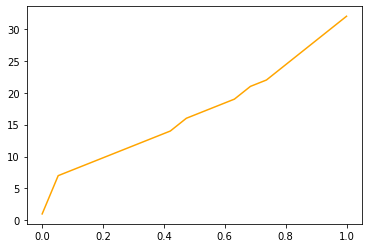

In [93]:
plt.plot(betas, ks, c='orange')
plt.show()

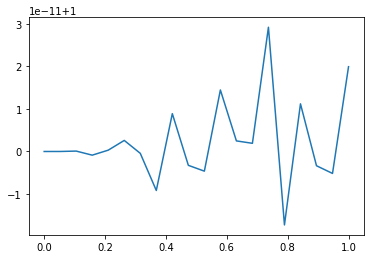

In [94]:
plt.plot(betas, eis)
plt.show()

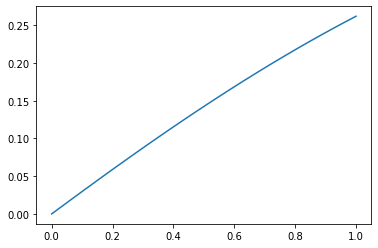

In [95]:
plt.plot(betas, deltas)
plt.show()

Видно, что beta - степень чувтствительности ранжирования. Чем она больше, тем больше разницы мужде популярным и непополярным сайтами

## *Задача 3*

- Скачайте файл, в котором представлен ориентированный граф, узлы которого составляют страницы stanford.edu, а направленные рёбра - ссылки между ними (граф задан матрицей смежности $l$ ). Распакуйте архив и загрузите его:
- Найдите PageRank для матрицы из предыдущего пункта. Для этого реализуйте степенную итерацию для нахождения собственного вектора, отвечающего максимальному собственному значению $G .$ Возьмите $\beta=0.8$
- Итерируйте до тех пор, пока 1-норма изменения вектора-кандидата не станет меньше $10^{-4}$. Сколько итераций понадобилось?
- Какому собственному значению отвечает найденный вектор и у какого узла наибольший РаgеRапk?
- Докажите, что 1 - максимально возможное собственное значение матрицы G.

In [100]:
refs = np.loadtxt("web-Stanford.txt", dtype=np.int32)

In [102]:
n = 281903
beta = 0.8

# make l matrix
l = np.zeros((n, n))
for ref in refs:
    l[ref[1]-1, ref[0]-1] = 1

# make G with provided beta and n
G = np.copy(l)
G[:, np.isclose(np.sum(l, axis=0), 0)] = 1 / n
G_raw = G / np.sum(G, axis=0)
G_final = beta * G_raw + (1 - beta) / n * np.ones(G.shape)

MemoryError: Unable to allocate 592. GiB for an array with shape (281903, 281903) and data type float64

Косяк. Будем использовать разреженные матрицы из scipy

In [103]:
import scipy.sparse as sps

In [106]:
n = 281903
beta = 0.8

# make l matrix
l = sps.lil_matrix((n, n))
for ref in refs:
    l[ref[1]-1, ref[0]-1] = 1

На данном этапе сталкиваемся с проблемой, что вообще говоря требуемая G не разрежена и следовательно надо что-то с этим думать.

## *Задача 4*

Характеристическое уравнение можно использовать для вычисления собственных значений, что приводит нас к наивному алгоритму:
$$
p(\lambda)=\operatorname{det}(A-\lambda I)
$$
1. Вычислить коэффициенты многочлена
2. Найти его корни
Это хорошая идея?
Посмотрим на небольшой пример 

Text(0, 0.5, 'Imaginary part')

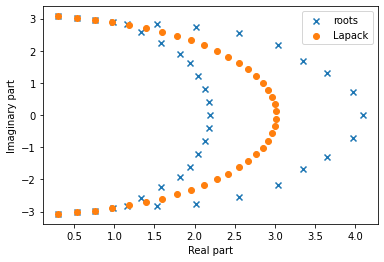

In [6]:
import numpy as np
n = 40
a = [[1.0 / (i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
ev = np.linalg.eigvals(a)
#There is a special numpy function for chacteristic polynomial
cf = np.poly(a)
ev_roots = np.roots(cf)
#print('Coefficients of the polynomial:', cf)
#print('Polynomial roots:', ev_roots)
plt.scatter(ev_roots.real, ev_roots.imag, marker='x', label='roots')
b = a + 0 * np.random.randn(n, n)
ev_b = np.linalg.eigvals(b)
plt.scatter(ev_b.real, ev_b.imag, marker='o', label='Lapack')
#plt.scatter(ev_roots.real, ev_roots.imag, marker='o', label='Brute force')
plt.legend(loc='best')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')

Мораль:
- Не делайте так, если только у вас нет серьёзной причины
- Поиск корней полинома - очень плохо обусловленная задача (задача может быть обусловлена не так плохо, но с использованием другого базиса в пространстве многочленов). Заметим, что матрицей Грама для мономов
$$
h_{i j}=\int_{0}^{1} x^{i} x^{j} d x=\frac{1}{i+j+1}
$$
является матрица Гильберта, у которой сингулярные числа экспоненциально убывают. Таким образом, мономы почти линейно зависимы.

Задание. 

Напишите программу для нахождения минимального по модулю собственного значения и соответствующего собственного вектора симметричной матрицы при использовании обратных итераций. С её помощью решите задачу для 
- матрицы Гильберта
- матрицы Лемера
- матрицы Паскаля 
- для симметричной трёхдиагональной матрицы, где на главной диагонали стоят 2, а на боковых диагоналях -1.

Напишите на основе этой программы функцию, которая ищет ближайшее к заданному числу собственное значение. 

Для перечисленных матриц вывести ответ для n = 2, 3, ... 10.

Матрицей Лемера называют матрицу, у которой элементы равны:

$a_{i j}=\frac{\min (i, j)}{\max (i, j)} $ (нумерация от 1)

Матрицей Паскаля называют матрицу, у которой элементы равны:

$S_{i j}=\left(\begin{array}{l}
n \\
r
\end{array}\right)=\frac{n !}{r !(n-r) !}, \quad n=i+j, \quad r=i$  (нумерация от 0) 

Примечание. Для некоторых матриц можно использовать также выражение обратной матрицы в явном виде.

 Матрица, обратная к матрице Гильберта, может быть выражена в явном виде через биномиальные коэффициенты:

$$
\left(H^{-1}\right)_{i j}=(-1)^{i+j}(i+j-1)\left(\begin{array}{c}
n+i-1 \\
n-j
\end{array}\right)\left(\begin{array}{c}
n+j-1 \\
n-i
\end{array}\right)\left(\begin{array}{c}
i+j-2 \\
i-1
\end{array}\right)^{2}
$$

где $n$ - порядок матрицы. Таким образом, элементы обратной матрицы $H^{-1}-$ целые числа.  

# Задача 5

Мы можем вычислить PageRank с помощью библиотек на Python. Будем использовать бибилотеку networkx для работы с графами, она может быть установлена с помощью следующей команды

conda install networkx

Возьмём простой пример графа Zachary karate club. Этот граф был собран вручную в 1977, и является классическим графом для анализа соцсетей.
https://en.wikipedia.org/wiki/Zachary%27s_karate_club  

  

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
kn = nx.read_gml('graph.gml')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph 

Сейчас мы можем вычислить PageRank, используя функцию, встроенную в NetworkX. Мы также изобразим вершины графа пропорционально тому, наскольку они важны в смысле величины PageRank'a.

  

In [ ]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)

Самостоятельно проделайте это всё для страниц stanford.edu

#Задача 6*

Во многих задачах необходимо найти максимальный или минимальный собственный вектор и соответствующее ему значение. Для этого используют вариационный принцип.

- Тогда, если $А$ эрмитова матрица, отношение Релея определяется как
$$
R_{A}(x)=\frac{(A x, x)}{(x, x)}
$$
и максимальное собственное значение равно максимальному значению $R_{A}(x)$, аналогично для минимального собственного значения.
- Таким образом, мы можем использовать методы оптимизации для поиска этих экстремальных собственных значений.


А теперь приведём понятие, которое является обобщением собственных чисел


- Для динамических систем с матрицей $А$, спектр может много сообщить о поведении системы (например, о её устойчивости)
- Однако для не нормальных матриц, спектр может быть неустойчивым относительно малых возмущений матрицы
- Для измерения подобных возмущений было разработана концепция псевдоспектра.

Псевдоспектр.

Рассмотрим объединение всех возможных собственных значений для всевозможных возмущений матрицы $\$ A \$ .$
$$
\Lambda_{\epsilon}(A)=\left\{\lambda \in \mathbb{C}: \exists E, x \neq 0:(A+E) x=\lambda x, \quad\|E\|_{2} \leq \epsilon .\right\}
$$

Для малых $Е$ и нормальных $А$ это круги вокруг собственных значений. Для не нормальных матриц структура может сильно отличаться. Подробности можно найти тут: http://www.cs.ox.ac.uk/pseudospectra/

Определение. 

Матрица $A$ называется нормальной матрицей, если
$$
A A^{*}=A^{*} A
$$

Какие примеры нормальных матриц вы можете привести?
Примеры: эрмитовы матрицы, унитарные матрицы.

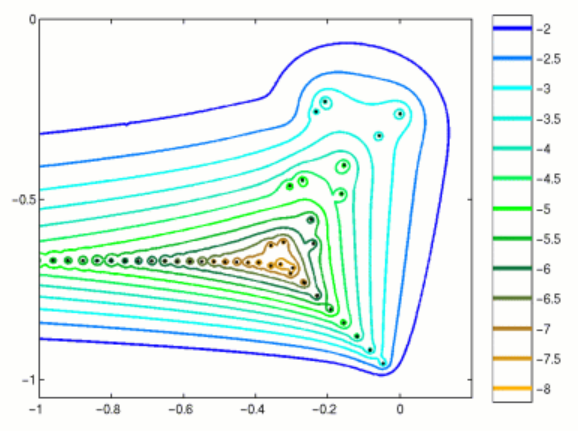

Докажите теорему Шура.

Теорема: Каждая матрица $A \in \mathbb{C}^{n \times n}$ может быть представлена в виде формы Шура $A = UTU^*$, где $U$ унитарная, а $T$ верхнетреугольная.






Докажите теорему о нормальных матрицах. 

Теорема: $A$ – нормальная матрица, тогда и только тогда, когда $A = U \Lambda U^*$, где $U$ унитарна и $\Lambda$ диагональна.

Это означает, что любая нормальная матрица – унитарно диагонализуема. То есть она может быть приведена к диагональному виду с помощью унитарной матрицы $U$. Другими словами, каждая нормальная матрица имеет ортогональный базис из собственных векторов. Ранее мы доказывали это другим способом.